In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
# NULL check
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [6]:
# duplicate check
df.duplicated().sum()

3854

In [7]:
# drop duplicates
df.drop_duplicates(inplace = True)

In [8]:
df.reset_index(drop=True)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
96141,Female,36.0,0,0,No Info,24.60,4.8,145,0
96142,Female,2.0,0,0,No Info,17.37,6.5,100,0
96143,Male,66.0,0,0,former,27.83,5.7,155,0
96144,Female,24.0,0,0,never,35.42,4.0,100,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [10]:
df['gender'].value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

<Axes: xlabel='gender'>

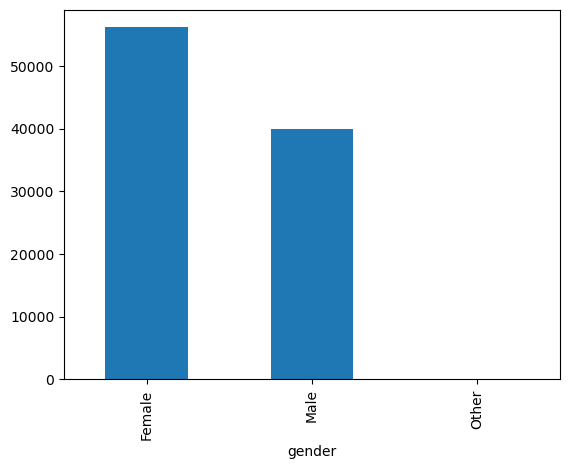

In [11]:
df.groupby("gender")['diabetes'].count().plot(kind = "bar")


In [12]:
# data encoding 
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])

In [13]:
mapping = {label: idx for idx, label in enumerate(le.classes_)}
print(mapping)

{'Female': 0, 'Male': 1, 'Other': 2}


In [14]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,No Info,24.60,4.8,145,0
99996,0,2.0,0,0,No Info,17.37,6.5,100,0
99997,1,66.0,0,0,former,27.83,5.7,155,0
99998,0,24.0,0,0,never,35.42,4.0,100,0


In [15]:
df['smoking_history'] = le.fit_transform(df['smoking_history'])

In [16]:
mapping = {label: idx for idx, label in enumerate(le.classes_)}
print(mapping)

{'No Info': 0, 'current': 1, 'ever': 2, 'former': 3, 'never': 4, 'not current': 5}


In [17]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,0,24.60,4.8,145,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  int32  
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  int32  
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int32(2), int64(4)
memory usage: 6.6 MB


<Axes: >

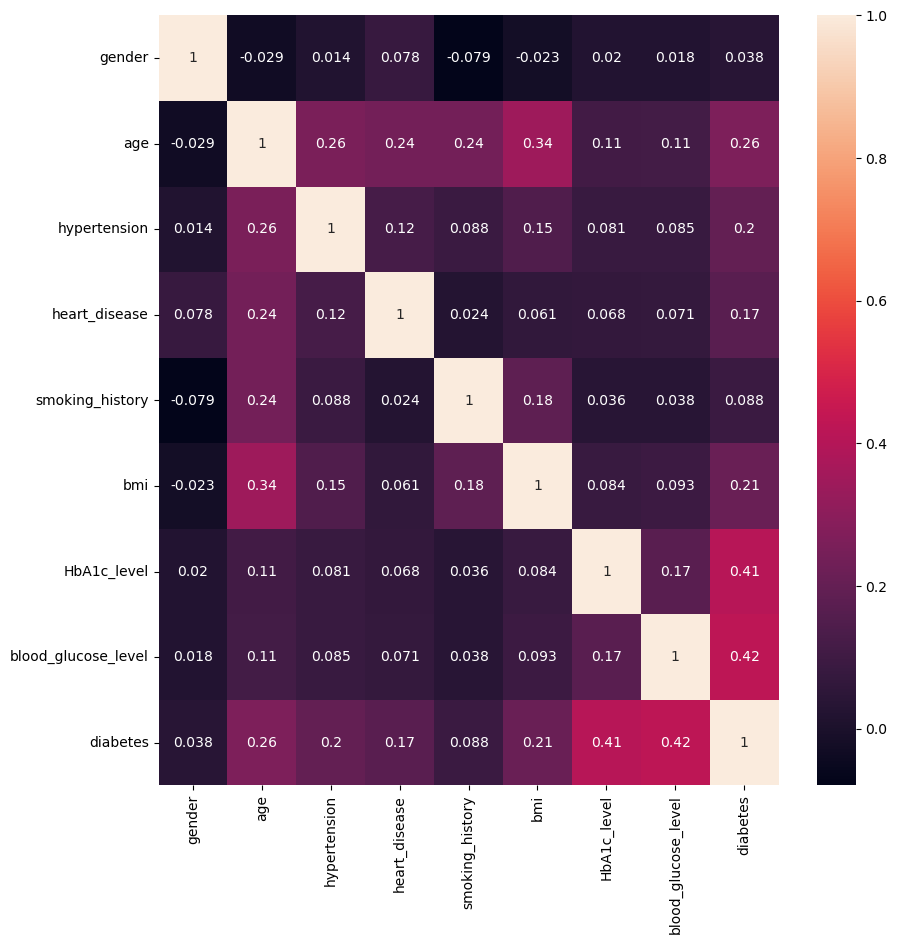

In [19]:
# correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [20]:
# splting the data into indepedent and dependent feature
X = df.drop('diabetes',axis=1)
y = df['diabetes']

In [21]:
X.reset_index(inplace=True)

In [24]:
X.drop('index',axis=1,inplace=True) 


<Axes: >

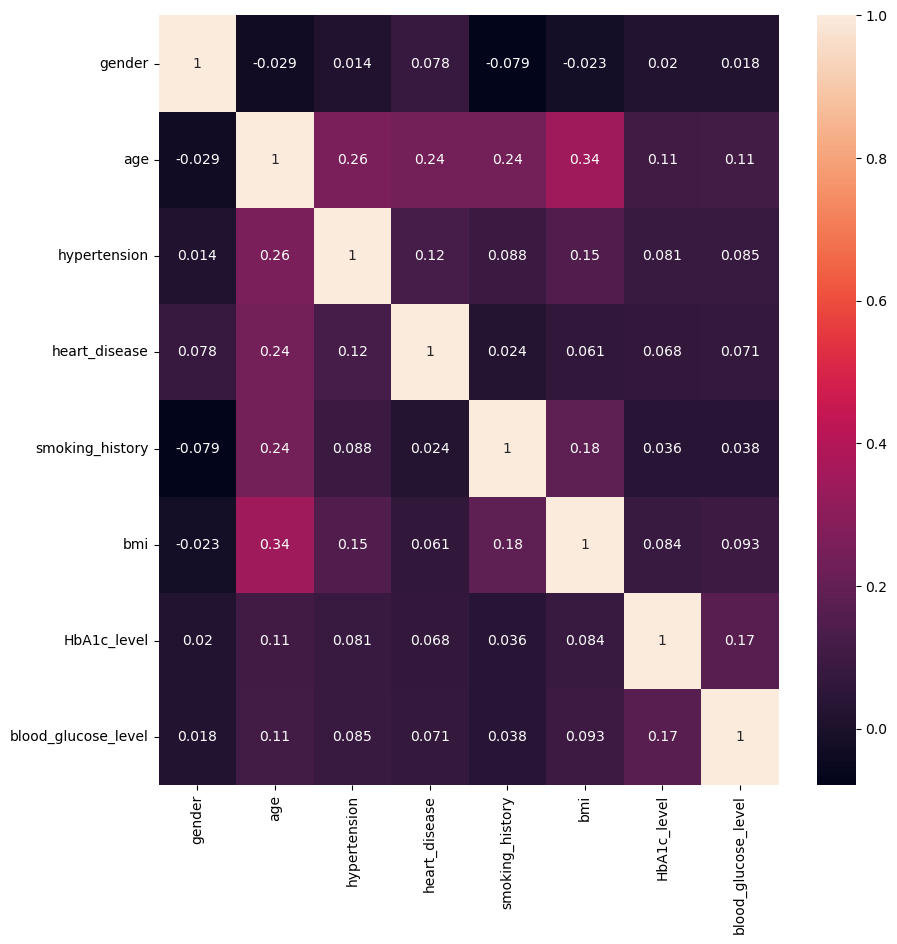

In [25]:
# correlation
plt.figure(figsize=(10,10))
sns.heatmap(X.corr(),annot=True)

In [26]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
# scaling the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# logistic regression
from sklearn.linear_model import LogisticRegression


lg_model = LogisticRegression()

lg_model.fit(X_train_scaled,y_train)

LogisticRegression()

In [29]:
y_pred = lg_model.predict(X_test_scaled)

In [30]:
# metrics

from sklearn.metrics import accuracy_score


print(accuracy_score(y_test,y_pred))

0.9569422776911076


In [31]:
# gridsearch cv
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold


cv = StratifiedKFold()

In [32]:
penalty = ['l1','l2','elasticnet']
c = [100,10,0.1,0.01]
solver = ['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga']


params = dict(penalty = penalty,C = c,solver = solver)

In [33]:
grid = GridSearchCV(estimator=lg_model,param_grid=params,n_jobs=-1)

In [34]:
grid.fit(X_train_scaled,y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
200 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver =

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [35]:
grid.best_params_

{'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}

In [36]:
# Scores

grid_pred = grid.predict(X_test_scaled)


print(accuracy_score(y_test,grid_pred))

0.9572542901716069


In [37]:
# there is no difference in getting accuracy score. so we will use logistic regression model

import joblib

joblib.dump(lg_model,"model.pkl")
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']